# Project: Predict Movie Box Office


Data for this case:   
        
        moviebuzz.csv 



In [204]:
# Data Imports
import numpy as np
import pandas as pd

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# For evaluating our ML results
from sklearn import metrics

## Exploratory Data Analysis (EDA)
    
Let us go ahead and take a look at the dataset

In [205]:
df = pd.read_csv('moviebuzz.csv')

In [206]:
df.head()

,Box,Rating,Budget,StarPower,Sequel,Action,Comedy,Animated,Horror,Fandango,HSX,Movie
0,63106589.0,2,150.0,42.51,1,0,0,1,0,0.79,143.03,Madagascar 2
1,69637740.0,3,37.0,16.75,0,0,0,0,0,0.77,128.01,Twilight
2,67528882.0,3,200.0,28.08,1,1,0,0,0,0.76,163.91,Quantum of Solace
3,70950500.0,3,85.0,16.62,1,1,0,0,0,0.71,105.91,Fast and Furious
4,14851136.0,3,55.0,23.61,0,0,0,0,0,0.70,84.16,Seven Pounds


### Exercise 1. Visualize the data

Reminder: our target is to predict box office.

In [207]:
# Your code
#sns.pairplot(df, hue='Box')


(array([ 2.,  6.,  8.,  3.,  5.,  3.,  4.,  4.,  6.,  1.,  4.,  3.,  2.,
         2.,  0.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         1.,  0.,  1.,  2.]),
 array([   511920.        ,   2859872.66666667,   5207825.33333333,
          7555778.        ,   9903730.66666667,  12251683.33333333,
         14599636.        ,  16947588.66666666,  19295541.33333333,
         21643494.        ,  23991446.66666666,  26339399.33333333,
         28687352.        ,  31035304.66666666,  33383257.33333333,
         35731210.        ,  38079162.66666666,  40427115.33333333,
         42775068.        ,  45123020.66666666,  47470973.33333333,
         49818926.        ,  52166878.66666666,  54514831.33333333,
         56862784.        ,  59210736.66666666,  61558689.33333333,
         63906641.99999999,  66254594.66666666,  68602547.33333333,
         70950500.        ]),
 <a list of 30 Patch objects>)

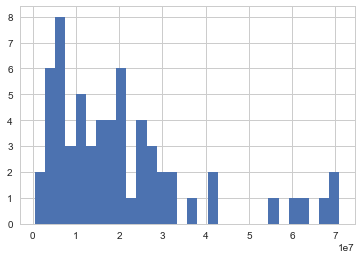

In [208]:
box_df = df['Box']
box_df.head()
plt.hist(box_df, bins=30)

  
 
# Prepare dataset

In [209]:
X = df.drop(['Box', 'Movie'], axis = 1)

X.shape

(62, 10)

In [210]:
Y = df['Box']

Y.head()
Y.shape

(62,)

# Using scikit learn to implement a multivariate linear regression

Hint: https://github.com/MIS6300-2017Fall/python-machine-learning/blob/master/1.1%20-%20Linear%20Regression%20Example%20(short%20version).ipynb

### Exercise 2. Implement a multivariate linear regression

You need to:

1. Split the data into training/testing sets
2. Create linear regression object
3. Train the model using the training sets
4. Make predictions using the testing set
5. Report coefficients, mean squared error(MSE) and variance score(R-square). 

In [221]:
# Your code
#Training and Test Sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [222]:
#regression object
mvlreg = LinearRegression(normalize=True)

yflat = np.vstack(y_train)
yflat.shape

(49, 1)

In [223]:
#train the model
mvlreg.fit(x_train, yflat)
#print('Coefficients: ', len(mvlreg.coef_))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [224]:
#predictions
test_predictions = mvlreg.predict(x_test)

In [228]:
#Coeffients
coefs = pd.DataFrame(x_train.columns)
coefs.columns = ["X's"]
coefs['Coef'] = pd.Series(mvlreg.coef_[0])
print(coefs)

print('Variance: %.2f' % metrics.r2_score(y_test, test_predictions))
print('Mean Squared Error: %.2f' % metrics.mean_squared_error(y_test, test_predictions))

#print(metrics.classification_report(y_test, test_predictions))

         X's          Coef
0     Rating -2.653598e+05
1     Budget -9.852329e+03
2  StarPower -9.692427e+04
3     Sequel  9.092263e+06
4     Action -8.383062e+06
5     Comedy -4.009007e+06
6   Animated -7.947446e+06
7     Horror -2.975622e+05
8   Fandango  1.729939e+07
9        HSX  3.339116e+05
Variance: 0.80
Mean Squared Error: 53355003465592.05


#### Not sure how to get the mean squared down... I tried flattening the y with vstack and ravel but neither work.